# Úloha 2
####    Data o několika stovkách klientů obsahují dva sloupce: pohlaví a věk. Máme hypotézu, že podíl žen mezi klienty se statisticky významně mění s věkem.
####    a) Navrhněte způsob, jak graficky znázornit data tak, abychom si udělali dobrou a korektní představu, zda může hypotéza platit.
####    b) Navrhněte vhodnou statistickou metodu, která by hypotézu na datech ověřila. Můžete uvést i více metod.

### Import packages

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

###    a) Navrhněte způsob, jak graficky znázornit data tak, abychom si udělali dobrou a korektní představu, zda může hypotéza platit.

### Dataset creation

In [142]:
def generate_dataset():
    
    initial_probability = 0.4  # Initial F/M ratio
    exponential_factor = 1.01
    data = []

    
    for age in range(18, 80):               # one age 18
        sample = random.randint(90, 100)      # sampling random big group of clients 90-100 to add a litle bit of noise 
        for i in range(sample):
            if random.random() < initial_probability:   # initial probability 0,4 = 4 from 10 will be assigned as Female 
                data.append(("F", age))                 
            else:
                data.append(("M", age))
        initial_probability *= exponential_factor                        # once one age run is done, we will modulate probability 
                
    dataset = pd.DataFrame(data)
    

    if not os.path.exists('./data'):
        os.makedirs('./data')
    dataset.columns = ['gender', 'age']
    dataset.to_csv("./data/data.csv", index=False)


generate_dataset()

Read data

In [148]:
# data import  
data = pd.read_csv("./data/data.csv")
data.head()

,gender,age
0,M,18
1,M,18
2,F,18
3,M,18
4,M,18


### Dataset vizualization

In [208]:
# 1) Data preprocessing
grouped_data = data.groupby("age").value_counts()
grouped_data_dataframe = pd.DataFrame(grouped_data)
grouped_data_dataframe.to_csv("./data/preprocessed_dataset.csv")

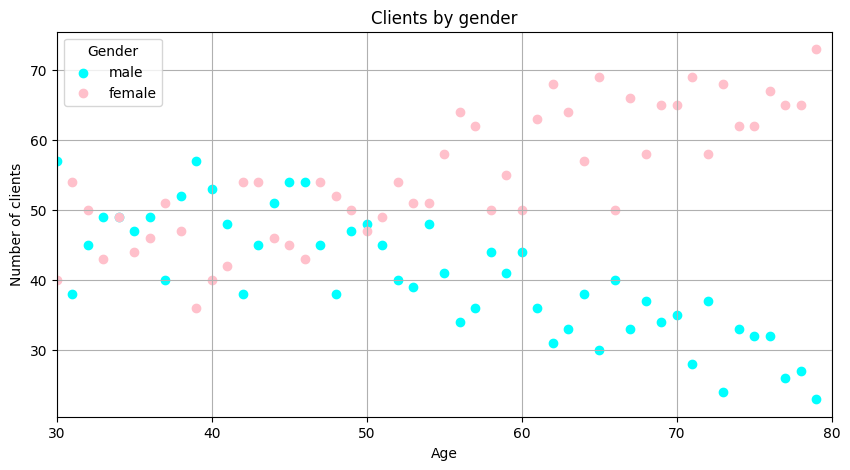

In [225]:
# 2) Data load
data_to_plot = pd.read_csv("./data/preprocessed_dataset.csv")

data_to_plot[data_to_plot["gender"] == "M"]["count"]
fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(x=data_to_plot[data_to_plot["gender"] == "M"]["age"],
           y=data_to_plot[data_to_plot["gender"] == "M"]["count"],
           color="cyan", 
           label="male")
ax.scatter(x=data_to_plot[data_to_plot["gender"] == "F"]["age"],
           y=data_to_plot[data_to_plot["gender"] == "F"]["count"],
           color="pink", 
           label="female")
ax.legend(title="Gender")
ax.set(title="Clients by gender", 
       xlabel="Age",
       ylabel="Number of clients")
ax.grid(True)
ax.set_xlim(30, 80)
plt.show()

### b) Navrhněte vhodnou statistickou metodu, která by hypotézu na datech ověřila. Můžete uvést i více metod.

In [231]:
import numpy as np
from scipy.stats import chi2_contingency

# Preprocessing
data = pd.read_csv("./data/preprocessed_dataset.csv")
data['gender'] = data['gender'].replace({'M': 1, 'F': 0})
data_array = np.array(data)

# Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(data_array)

# Print the p-value
print(f"P-value: {p}")

# Interpret the result
alpha = 0.05
if p < alpha:
    print("Significant difference in the ratio of M to F across the groups/time points.")
else:
    print("No significant difference in the ratio of M to F across the groups/time points.")

P-value: 4.063614230157122e-39
Significant difference in the ratio of M to F across the groups/time points.


C:\Users\DekanovskyL\AppData\Local\Temp\ipykernel_14460\1014726365.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace({'M': 1, 'F': 0})
